# CS 6140 Machine Learning: Assignment - 2 (Total Points: 100)
## Prof. Ahmad Uzair





## Question 1 - Support Vector Machine and MLP  (30 points)



 In this problem you will be applying Support Vector Machine and Multi layer perceptron for binary classification.



You will train and test Support Vector Machine (SVM) and Multi-layer Perceptron (MLP) classifiers that aim for minimum probability of classification error. You may use any standard library of your choice. The SVM should use a Gaussian (radial-basis) kernel. The MLP should be a single-hidden layer model with your choice of activation functions for all perceptrons.

Generate 1000 independent and identically distributed (iid) samples for training and 5000 iid samples for testing. All data for class L ∈ {0, 1}, which are equiprobable and two dimensional, should be generated as follows:


x = r<sub>L</sub> * [cos(θ) sin(θ)]<sup>T</sup> + n

where,

 θ ∼ Uniform[−π, π],

 n ∼ N(0, σ<sup>2</sup>I), Note: N represents the Gaussian distribution 

 r<sub>0</sub> = 2, r<sub>1</sub> = 4, σ = 1


Note: The two class sample sets will be highly overlapping two concentric disks, and due to angular symmetry, we anticipate the best classification boundary to be a circle between the two disks. Your SVM and MLP models will try to approximate it.

Use the training data with 10-fold cross-validation to determine the best hyperparameters (box constraints parameter and Gaussian kernel width for the SVM, number of perceptrons in the hidden layer for the MLP). Once these hyperparameters are set, train your final SVM and MLP classifier using the entire training data set. Apply your trained SVM and MLP classifiers to the test data set and estimate the probability of error from this data set.

Show the following: 

(1) visual and numerical demonstrations of the K-fold cross-validation process indicating how the hyperparameters for SVM and MLP classifiers are set.

(2) visual and numerical demonstrations of the performance of your SVM and MLP classifiers on the test dataset.


Hint: For hyperparameter selection, you may show the performance estimates for various choices and indicate where the best result is achieved. For test performance, you may show the data and classification boundary superimposed, along with an estimated probability of error from the samples.


In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
random.seed(8)

random_n = np.random.multivariate_normal([0, 0], np.identity(2), 6000)
random_theta = np.random.uniform(-np.pi, np.pi, 6000)
random_labels = np.random.randint(2, size = 6000)

fea = []
for i in range(6000):
    if random_labels[i] == 0:
        x = 2 * np.array([np.cos(random_theta[i]), np.sin(random_theta[i])]).T + random_n[i]
    else:
        x = 4 * np.array([np.cos(random_theta[i]), np.sin(random_theta[i])]).T + random_n[i]
    fea.append(x)

data = np.concatenate((np.array(fea), np.array([random_labels]).T), axis = 1)

df = pd.DataFrame(data, columns = ['x0', 'x1', 'Label'])

x_train, x_test, y_train, y_test = model_selection.train_test_split(df.iloc[:, : 2], df.iloc[:, 2], shuffle = False, train_size = 1000)

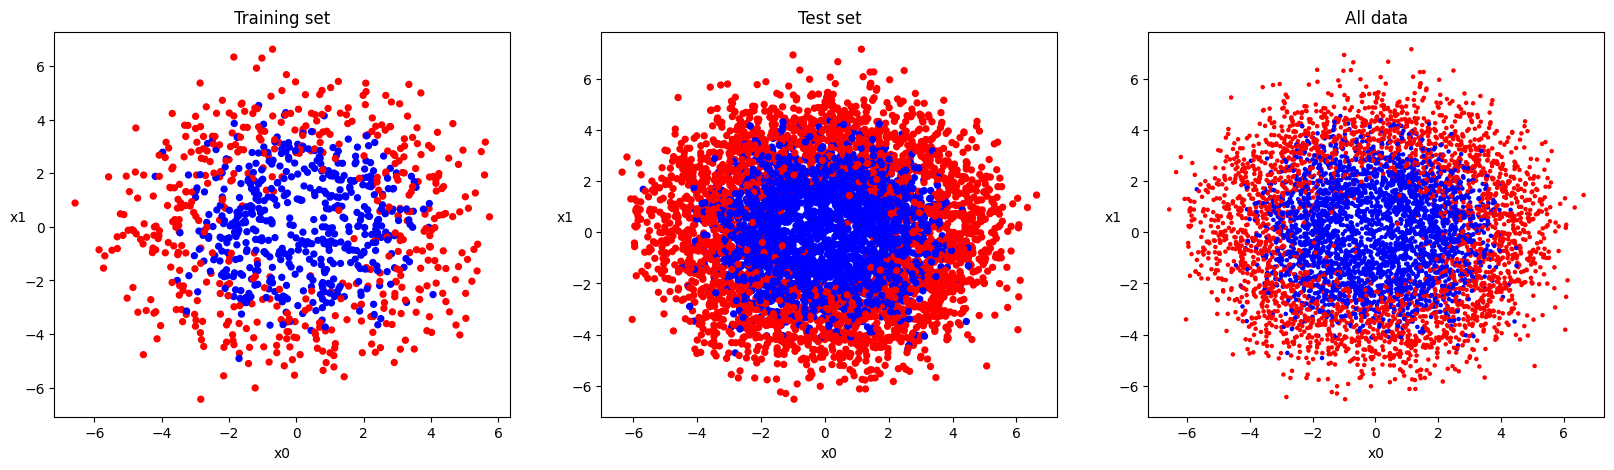

In [3]:
fig1, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 5))
ax1.scatter(x_train['x0'], x_train['x1'], s = 18, c = y_train.map(lambda t: 'r' if t == 1 else 'b'))
ax1.set_title('Training set')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1', rotation='horizontal')

ax2.scatter(x_test['x0'], x_test['x1'], s = 18, c = y_test.map(lambda t: 'r' if t == 1 else 'b'))
ax2.set_title('Test set')
ax2.set_xlabel('x0')
ax2.set_ylabel('x1', rotation='horizontal')

ax3.scatter(df['x0'], df['x1'], s = 5, c = df['Label'].map(lambda t: 'r' if t == 1 else 'b'))
ax3.set_title('All data')
ax3.set_xlabel('x0')
ax3.set_ylabel('x1', rotation='horizontal')

fig1.show()

## (1). Select Hyperparameters

In [4]:
def svc_param_selection(x_, y_, k_folds = 10):
    cs = [0.1, 1, 10, 20]
    gammas = [0.1, 1, 2, 4, 6, 8, 10]
    param_grid = {'C': cs, 'gamma': gammas}
    grid_search = model_selection.GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv = k_folds)
    grid_search.fit(x_, y_)

    params = list(zip(grid_search.cv_results_['params'], list(grid_search.cv_results_['mean_test_score'])))
    for i in sorted(params, key = lambda x: x[1], reverse = True):
        print(i)

    return grid_search.best_params_, grid_search.best_score_, params

def mlp_param_selection(x_, y_, k_folds = 10):
    hidden_units = []
    for i in range(1, 26):
        hidden_units.append((i, ))
    param_grid = {'hidden_layer_sizes': hidden_units, 'max_iter': [2000]}
    grid_search = model_selection.GridSearchCV(MLPClassifier(), param_grid, cv = k_folds, refit = 'accuracy_score')
    grid_search.fit(x_, y_)

    params = list(zip(grid_search.cv_results_['params'], list(grid_search.cv_results_['mean_test_score'])))
    for i in sorted(params, key = lambda x: x[1], reverse = True):
        print(i)

    return grid_search.best_params_, grid_search.best_score_, params

#### Numerical results from hyperparameters of SVM

In [5]:
best_params_svm, best_score_svm, params_svm = svc_param_selection(x_train, y_train, 10)
print('Best Parameters for SVM: ', best_params_svm, end = '')
print(': ', best_score_svm)

({'C': 1, 'gamma': 0.1}, 0.8280000000000001)
({'C': 0.1, 'gamma': 0.1}, 0.825)
({'C': 10, 'gamma': 0.1}, 0.8220000000000001)
({'C': 20, 'gamma': 0.1}, 0.8200000000000001)
({'C': 0.1, 'gamma': 1}, 0.82)
({'C': 1, 'gamma': 1}, 0.8119999999999999)
({'C': 0.1, 'gamma': 2}, 0.8089999999999999)
({'C': 1, 'gamma': 2}, 0.807)
({'C': 10, 'gamma': 1}, 0.8019999999999999)
({'C': 20, 'gamma': 1}, 0.798)
({'C': 1, 'gamma': 4}, 0.7940000000000002)
({'C': 1, 'gamma': 6}, 0.788)
({'C': 1, 'gamma': 10}, 0.787)
({'C': 1, 'gamma': 8}, 0.784)
({'C': 10, 'gamma': 2}, 0.7729999999999999)
({'C': 0.1, 'gamma': 4}, 0.76)
({'C': 20, 'gamma': 2}, 0.754)
({'C': 10, 'gamma': 4}, 0.742)
({'C': 20, 'gamma': 4}, 0.732)
({'C': 10, 'gamma': 10}, 0.731)
({'C': 10, 'gamma': 8}, 0.7300000000000001)
({'C': 10, 'gamma': 6}, 0.73)
({'C': 20, 'gamma': 8}, 0.73)
({'C': 20, 'gamma': 10}, 0.729)
({'C': 20, 'gamma': 6}, 0.724)
({'C': 0.1, 'gamma': 6}, 0.647)
({'C': 0.1, 'gamma': 8}, 0.549)
({'C': 0.1, 'gamma': 10}, 0.513999999999

#### Visual results from hyperparameters of SVM

In [6]:
def get_degree_gamma():
    C = []
    gamma = [[], [], [], []]
    sc = [[], [], [], []]
    for param, score in params_svm:
        if param['C'] == 0.1:
            gamma[0].append(param['gamma'])
            sc[0].append(score)
        elif param['C'] == 1:
            gamma[1].append(param['gamma'])
            sc[1].append(score)
        elif param['C'] == 10:
            gamma[2].append(param['gamma'])
            sc[2].append(score)
        elif param['C'] == 20:
            gamma[3].append(param['gamma'])
            sc[3].append(score)
    return np.array(C), np.array(gamma), np.array(sc)

svm_C, svm_gamma, svm_score = get_degree_gamma()

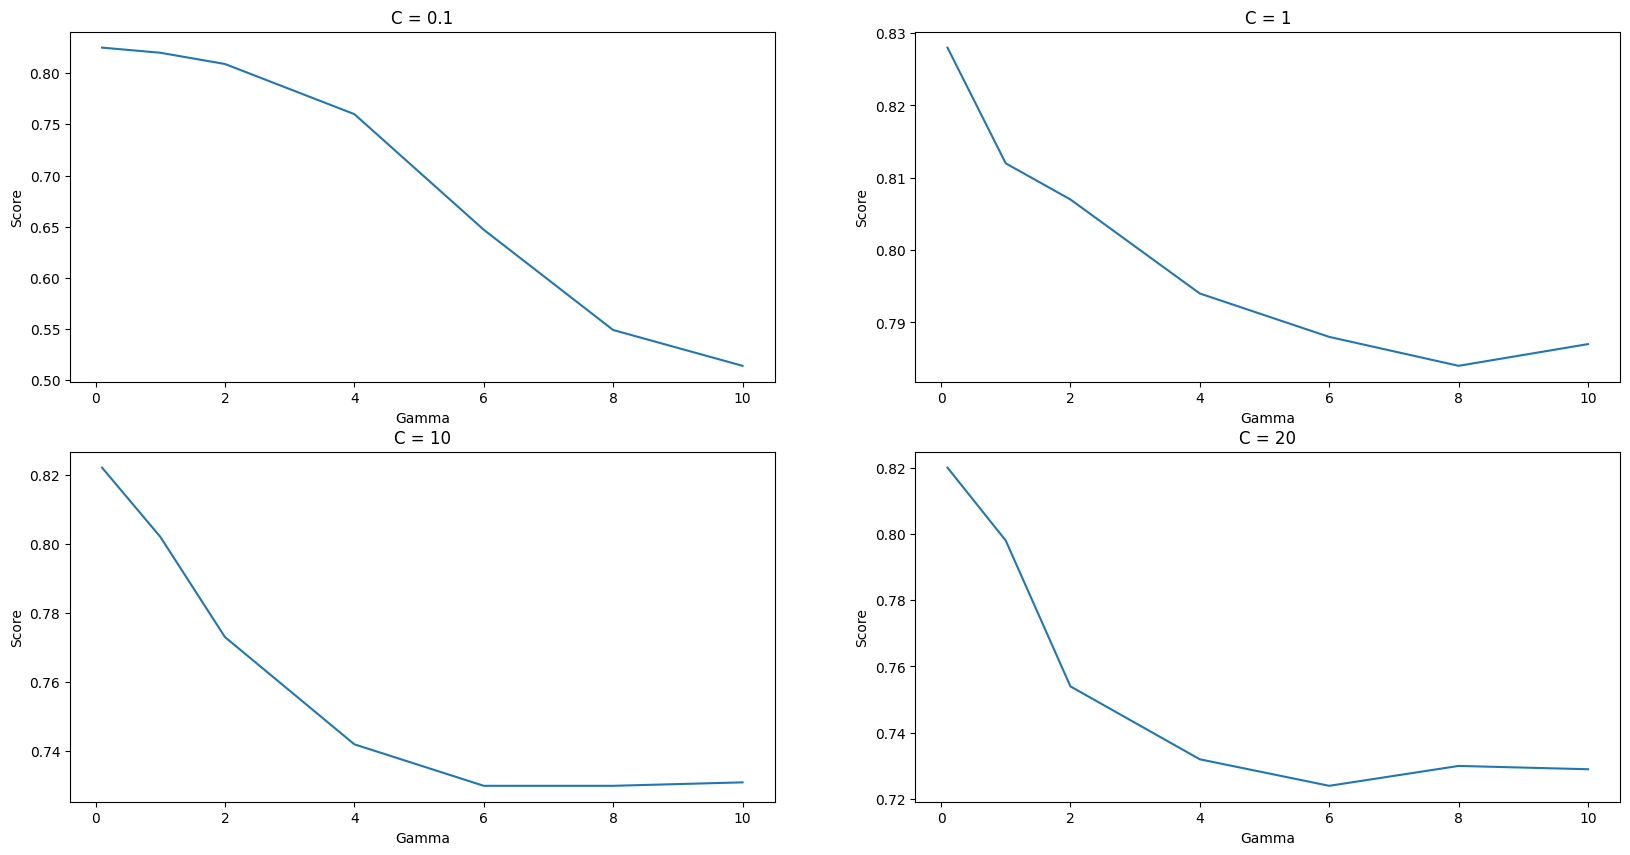

In [7]:
fig2, axes = plt.subplots(2, 2, figsize = (20, 10))

axes[0, 0].plot(svm_gamma[0], svm_score[0])
axes[0, 0].set_title('C = 0.1')
axes[0, 0].set_xlabel('Gamma')
axes[0, 0].set_ylabel('Score')

axes[0, 1].plot(svm_gamma[1], svm_score[1])
axes[0, 1].set_title('C = 1')
axes[0, 1].set_xlabel('Gamma')
axes[0, 1].set_ylabel('Score')

axes[1, 0].plot(svm_gamma[2], svm_score[2])
axes[1, 0].set_title('C = 10')
axes[1, 0].set_xlabel('Gamma')
axes[1, 0].set_ylabel('Score')

axes[1, 1].plot(svm_gamma[3], svm_score[3])
axes[1, 1].set_title('C = 20')
axes[1, 1].set_xlabel('Gamma')
axes[1, 1].set_ylabel('Score')

fig2.show()

#### Numerical results from hyperparameters of MLP

In [8]:
best_params_mlp, best_score_mlp, params_mlp = mlp_param_selection(x_train, y_train, 10)
print('Best Parameters for MLP: ', best_params_mlp, end = '')
print(': ', best_score_mlp)

({'hidden_layer_sizes': (23,), 'max_iter': 2000}, 0.8300000000000001)
({'hidden_layer_sizes': (9,), 'max_iter': 2000}, 0.8290000000000001)
({'hidden_layer_sizes': (18,), 'max_iter': 2000}, 0.826)
({'hidden_layer_sizes': (20,), 'max_iter': 2000}, 0.8240000000000001)
({'hidden_layer_sizes': (25,), 'max_iter': 2000}, 0.8240000000000001)
({'hidden_layer_sizes': (13,), 'max_iter': 2000}, 0.8230000000000001)
({'hidden_layer_sizes': (14,), 'max_iter': 2000}, 0.8230000000000001)
({'hidden_layer_sizes': (16,), 'max_iter': 2000}, 0.8230000000000001)
({'hidden_layer_sizes': (22,), 'max_iter': 2000}, 0.8230000000000001)
({'hidden_layer_sizes': (24,), 'max_iter': 2000}, 0.8230000000000001)
({'hidden_layer_sizes': (17,), 'max_iter': 2000}, 0.8220000000000001)
({'hidden_layer_sizes': (21,), 'max_iter': 2000}, 0.8220000000000001)
({'hidden_layer_sizes': (15,), 'max_iter': 2000}, 0.8210000000000001)
({'hidden_layer_sizes': (10,), 'max_iter': 2000}, 0.8190000000000002)
({'hidden_layer_sizes': (11,), 'ma

#### Visual results from hyperparameters of MLP

In [9]:
def get_hidden_units():
    units = []
    acc = []
    for param, a in params_mlp:
        units.append(param['hidden_layer_sizes'][0])
        acc.append(a)

    return np.array(units), np.array(acc)

mlp_units, mlp_acc = get_hidden_units()

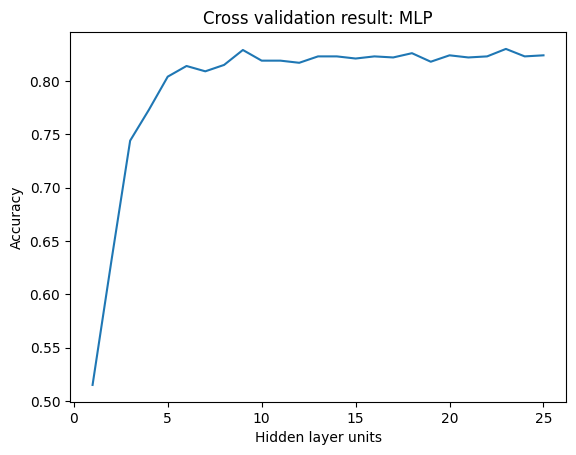

In [10]:
fig3 = plt.figure()
plt.plot(mlp_units, mlp_acc)
plt.title('Cross validation result: MLP')
plt.xlabel('Hidden layer units')
plt.ylabel('Accuracy')
fig3.show()

## (2). Performance

In [11]:
np_x_test = np.array(x_test)
np_y_test = np.array(y_test)

#### Performance of SVM on test set

Epochs: 50		Acc: 0.5242		MSE: 0.4758
Epochs: 100		Acc: 0.6630		MSE: 0.3370
Epochs: 150		Acc: 0.6726		MSE: 0.3274
Epochs: 200		Acc: 0.7908		MSE: 0.2092
Epochs: 250		Acc: 0.8252		MSE: 0.1748
Epochs: 300		Acc: 0.8228		MSE: 0.1772
Epochs: 350		Acc: 0.8228		MSE: 0.1772
Epochs: 400		Acc: 0.8230		MSE: 0.1770
Epochs: 450		Acc: 0.8232		MSE: 0.1768
Epochs: 500		Acc: 0.8232		MSE: 0.1768
Epochs: 550		Acc: 0.8232		MSE: 0.1768
Epochs: 600		Acc: 0.8232		MSE: 0.1768
Epochs: 650		Acc: 0.8232		MSE: 0.1768
Epochs: 700		Acc: 0.8232		MSE: 0.1768
Epochs: 750		Acc: 0.8232		MSE: 0.1768
Epochs: 800		Acc: 0.8232		MSE: 0.1768
Epochs: 850		Acc: 0.8232		MSE: 0.1768
Epochs: 900		Acc: 0.8232		MSE: 0.1768
Epochs: 950		Acc: 0.8232		MSE: 0.1768
Epochs: 1000		Acc: 0.8232		MSE: 0.1768


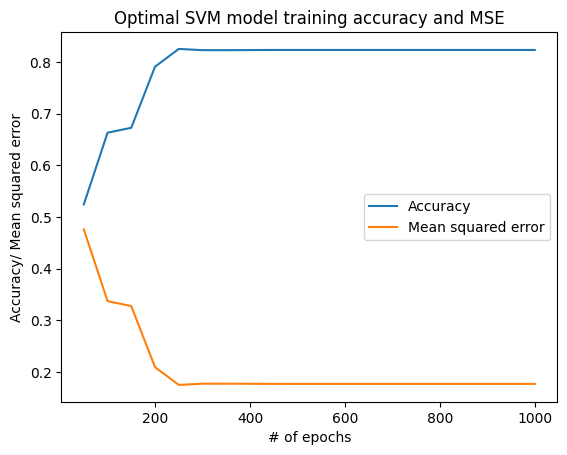

In [12]:
svm_epochs = []
svm_accs = []
svm_mses = []
for e in range(50, 1001, 50):
    svm_clf = svm.SVC(kernel = 'rbf', C = best_params_svm['C'], gamma = best_params_svm['gamma'], max_iter = e)
    svm_clf.fit(x_train, y_train)
    y_pred_svm = svm_clf.predict(x_test)
    svm_acc = metrics.accuracy_score(y_pred_svm, y_test)
    svm_mse = metrics.mean_squared_error(y_pred_svm, y_test)

    svm_epochs.append(e)
    svm_accs.append(svm_acc)
    svm_mses.append(svm_mse)
    print('Epochs: %s\t\tAcc: %.4f\t\tMSE: %.4f' % (e, svm_acc, svm_mse))

fig4 = plt.figure()

plt.title('Optimal SVM model training accuracy and MSE')
plt.xlabel('# of epochs')
plt.ylabel('Accuracy/ Mean squared error')
plt.plot(svm_epochs, svm_accs, label = 'Accuracy')
plt.plot(svm_epochs, svm_mses, label = 'Mean squared error')
plt.legend()

fig4.show()

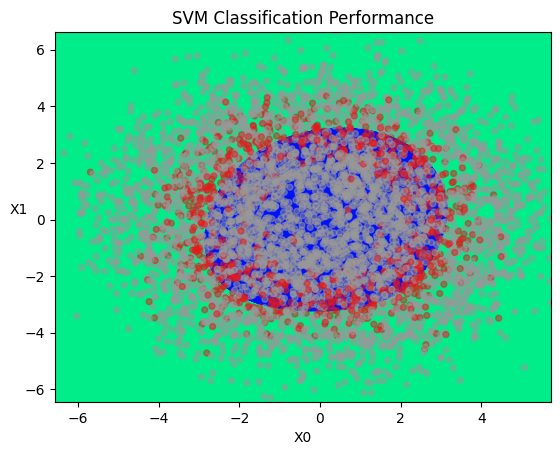

In [13]:
svm_clf = svm.SVC(kernel = 'rbf', C = best_params_svm['C'], gamma = best_params_svm['gamma'], max_iter = 2000).fit(x_train, y_train)
svm_prediction = plt.figure()

svm_x_min, svm_x_max = x_train['x0'].min(), x_train['x0'].max()
svm_y_min, svm_y_max = x_train['x1'].min(), x_train['x1'].max()
svm_xx, svm_yy = np.meshgrid(np.arange(svm_x_min, svm_x_max, 0.02), np.arange(svm_y_min, svm_y_max, 0.02))

svm_y_pred = svm_clf.predict(x_test)
svm_y_p = svm_clf.predict(np.c_[svm_xx.ravel(), svm_yy.ravel()])
svm_y_p = svm_y_p.reshape(svm_xx.shape)

svm_acc_data = []
for x, y, y_p in zip(np_x_test, np_y_test, svm_y_pred):
    if y == y_p:
        svm_acc_data.append(np.append(x, 1))
    else:
        svm_acc_data.append(np.append(x, 0))
svm_acc_df = pd.DataFrame(svm_acc_data, columns = ['x0', 'x1', 'Label'])

plt.contourf(svm_xx, svm_yy, svm_y_p, cmap = plt.cm.winter, alpha = 1)
plt.scatter(svm_acc_df['x0'], svm_acc_df['x1'], s = 18, c = svm_acc_df['Label'], marker = 'o', alpha = 0.5, cmap = plt.cm.Set1)
plt.xlabel('X0')
plt.ylabel('X1', rotation = 'horizontal')
plt.xlim(svm_xx.min(), svm_xx.max())
plt.ylim(svm_yy.min(), svm_yy.max())
plt.title('SVM Classification Performance')

svm_prediction.show()

#### Performance of MLP on test set


Epochs: 50		Acc: 0.7760		MSE: 0.2240
Epochs: 100		Acc: 0.8186		MSE: 0.1814
Epochs: 150		Acc: 0.8270		MSE: 0.1730
Epochs: 200		Acc: 0.8248		MSE: 0.1752
Epochs: 250		Acc: 0.8262		MSE: 0.1738
Epochs: 300		Acc: 0.8266		MSE: 0.1734
Epochs: 350		Acc: 0.8264		MSE: 0.1736
Epochs: 400		Acc: 0.8248		MSE: 0.1752
Epochs: 450		Acc: 0.8244		MSE: 0.1756
Epochs: 500		Acc: 0.8220		MSE: 0.1780
Epochs: 550		Acc: 0.8274		MSE: 0.1726
Epochs: 600		Acc: 0.8268		MSE: 0.1732
Epochs: 650		Acc: 0.8262		MSE: 0.1738
Epochs: 700		Acc: 0.8244		MSE: 0.1756
Epochs: 750		Acc: 0.8244		MSE: 0.1756
Epochs: 800		Acc: 0.8246		MSE: 0.1754
Epochs: 850		Acc: 0.8258		MSE: 0.1742
Epochs: 900		Acc: 0.8242		MSE: 0.1758
Epochs: 950		Acc: 0.8248		MSE: 0.1752
Epochs: 1000		Acc: 0.8222		MSE: 0.1778


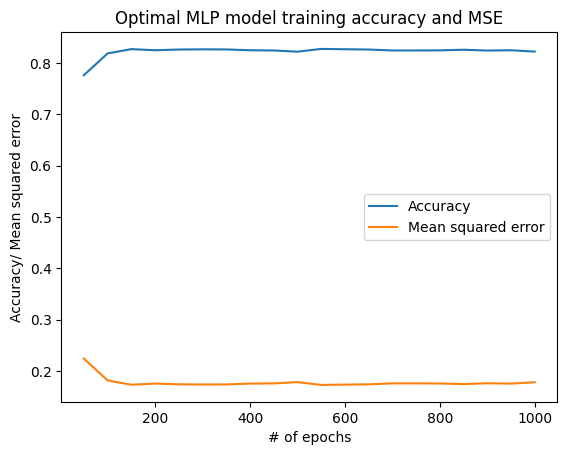

In [14]:
mlp_epochs = []
mlp_accs = []
mlp_mses = []
for e in range(50, 1001, 50):
    mlp_clf = MLPClassifier(hidden_layer_sizes = best_params_mlp['hidden_layer_sizes'], max_iter = e)
    mlp_clf.fit(x_train, y_train)
    y_pred_mlp = mlp_clf.predict(x_test)
    mlp_acc = metrics.accuracy_score(y_pred_mlp, y_test)
    mlp_mse = metrics.mean_squared_error(y_pred_mlp, y_test)

    mlp_epochs.append(e)
    mlp_accs.append(mlp_acc)
    mlp_mses.append(mlp_mse)
    print('Epochs: %s\t\tAcc: %.4f\t\tMSE: %.4f' % (e, mlp_acc, mlp_mse))

fig5 = plt.figure()

plt.title('Optimal MLP model training accuracy and MSE')
plt.xlabel('# of epochs')
plt.ylabel('Accuracy/ Mean squared error')
plt.plot(mlp_epochs, mlp_accs, label = 'Accuracy')
plt.plot(mlp_epochs, mlp_mses, label = 'Mean squared error')
plt.legend()

fig5.show()

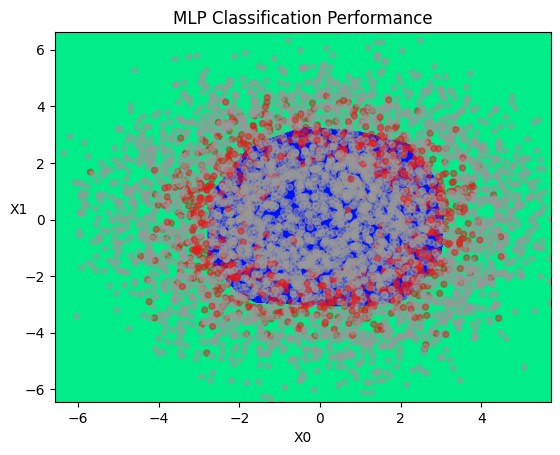

In [15]:
mlp_clf = MLPClassifier(hidden_layer_sizes = best_params_mlp['hidden_layer_sizes'], max_iter = 2000).fit(x_train, y_train)
mlp_prediction = plt.figure()

mlp_x_min, mlp_x_max = x_train['x0'].min(), x_train['x0'].max()
mlp_y_min, mlp_y_max = x_train['x1'].min(), x_train['x1'].max()
mlp_xx, mlp_yy = np.meshgrid(np.arange(mlp_x_min, mlp_x_max, 0.02), np.arange(mlp_y_min, mlp_y_max, 0.02))

mlp_y_pred = mlp_clf.predict(x_test)
mlp_y_p = mlp_clf.predict(np.c_[mlp_xx.ravel(), mlp_yy.ravel()])
mlp_y_p = mlp_y_p.reshape(mlp_xx.shape)

mlp_acc_data = []
for x, y, y_p in zip(np_x_test, np_y_test, mlp_y_pred):
    if y == y_p:
        mlp_acc_data.append(np.append(x, 1))
    else:
        mlp_acc_data.append(np.append(x, 0))
mlp_acc_df = pd.DataFrame(mlp_acc_data, columns = ['x0', 'x1', 'Label'])

plt.contourf(mlp_xx, mlp_yy, mlp_y_p, cmap = plt.cm.winter, alpha = 1)
plt.scatter(mlp_acc_df['x0'], mlp_acc_df['x1'], s = 18, c = mlp_acc_df['Label'], marker = 'o', alpha = 0.5, cmap = plt.cm.Set1)
plt.xlabel('X0')
plt.ylabel('X1', rotation = 'horizontal')
plt.xlim(mlp_xx.min(), mlp_xx.max())
plt.ylim(mlp_yy.min(), mlp_yy.max())
plt.title('MLP Classification Performance')

mlp_prediction.show()